# M50 Homework 3

## Alex Craig

## Exercise 1.
(Testing for normality): Here we consider the dataset that can be loaded with

```python
df = pd.read˙csv(”https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv”)
```

### Part A
Let $Y$ denote the data from the column earn, which contains peoples earnings from this sample of adults in the US. Using this sample, estimate:

$$
\mathbb{P}(Y > \mu_Y + 2\sigma_Y)
$$

where $\mu_Y$ and $\sigma_Y$ are the mean and standard deviation of the earnings (these will need to be estimated along the way).

### Solution
Denotes our estimations of $\mu_Y$ and $\sigma_Y$ as $\bar{\mu}_Y$ and $\bar{\sigma}_Y$ respectively. Then we have

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv")

Y = df['earn']

mu_bar = Y.mean()
sigma_bar = Y.std()

probability = (Y > mu_bar + 2*sigma_bar).mean()

print(f"Sample mean: {mu_bar}")
print(f"Sample standard deviation: {sigma_bar}")
print(f"P(Y > mu_bar + 2*sigma_bar): {probability}")

Sample mean: 21147.296255506608
Sample standard deviation: 22531.76512330289
P(Y > mu_bar + 2*sigma_bar): 0.02918502202643172


### Part B
Based on your results from part (a), do you think the distribution of earnings is accurately captured by a Normal random variable?

### Solution
Let us assume $Y \sim N(\bar{\mu}_Y, \bar{\sigma}_Y^2)$, and then compare the empirical CDF of $Y$ to the CDF of $N(\bar{\mu}_Y, \bar{\sigma}_Y^2)$.

In [3]:
import scipy.stats as stats

print(f"Empirical CDF probability: {probability}")

# Analytical solution
print(f"Normal CDF probability: {1 - stats.norm.cdf(mu_bar + 2*sigma_bar, loc = mu_bar, scale = sigma_bar)}")

Empirical CDF probability: 0.02918502202643172
Normal CDF probability: 0.02275013194817921


We can see that the empirical and normal CDFs are very similar, so we can conclude that the distribution of earnings is accurately captured by a Normal random variable.

### Part C
Repeat (a) and (b) with data from the height column. Do you think the variation height data is accurately approximated by a Normal distribution?

### Solution

## Exercise 2.
(Computation with normal variables): Let

$$
Z_1 \sim N(0, 1^2), \quad Z_2 \sim N(1, 4)
$$

be independent.

### Part A
Using the estimates of Normal probabilities in class, compute the following:
1. $\mathbb{P}(Z_1 > 2)$
2. $\mathbb{P}(Z_1 + Z_2 < 6)$
3. $\mathbb{P}(Z_1 - Z_2 > 4)$

### Solution
1. 
$$
\mathbb{P}(Z_1 > 2) = 1 - \mathbb{P}(Z_1 \leq 2) = 1 - \Phi(2) \approx 1 - 0.9772 = 0.0228
$$

2. 
Let $X = Z_1 + Z_2$. Then $E[X] = E[Z_1 + Z_2] = E[Z_1] + E[Z_2] = 0 + 1 = 1$ and $Var(X) = Var(Z_1 + Z_2) = Var(Z_1) + Var(Z_2) = 1 + 4 = 5$. 

Therefore, $X \sim N(1, 5)$. 

Therefore,  $\mathbb{P}(Z_1 + Z_2 < 6) = \mathbb{P}(X < 6) = \mathbb{P}\left(\frac{X - 1}{\sqrt{5}} < \frac{6 - 1}{\sqrt{5}}\right) = \mathbb{P}(Z_1 < 2.236) = \Phi(2.236) \approx 0.9873$

3. 
Let $Y = Z_1 - Z_2$. Then $E[Y] = E[Z_1 - Z_2] = E[Z_1] - E[Z_2] = 0 - 1 = -1$ and $Var(Y) = Var(Z_1 - Z_2) = Var(Z_1) + Var(Z_2) = 1 + 4 = 5$.

Therefore, $Y \sim N(-1, 5)$.

Therefore, $\mathbb{P}(Z_1 - Z_2 > 4) = \mathbb{P}(Y > 4) = \mathbb{P}\left(\frac{Y + 1}{\sqrt{5}} > \frac{4 + 1}{\sqrt{5}}\right) = \mathbb{P}(Z_1 > 3.162) = 1 - \Phi(2.236) \approx 1 - 0.9873 = 0.0127$

### Part B
Check your answers with monte carlo simulations in python.

### Solution

In [4]:
import numpy as np

# Number of samples
N = 10000000

# Simulate samples from Z_1 and Z_2
z1_samples = np.random.normal(0, 1, N)
z2_samples = np.random.normal(1, 2, N)

# Compute the probabilities:

# P(Z_1 > 2)
prob_z1_gt_2 = np.mean(z1_samples > 2)

# P(Z_1 + Z_2 < 6)
prob_z1_plus_z2_lt_6 = np.mean(z1_samples + z2_samples < 6)

# P(Z_1 - Z_2 > 4)
prob_z1_minus_z2_gt_4 = np.mean(z1_samples - z2_samples > 4)

print(f"P(Z_1 > 2) ≈ {prob_z1_gt_2:.4f}")
print(f"P(Z_1 + Z_2 < 6) ≈ {prob_z1_plus_z2_lt_6:.4f}")
print(f"P(Z_1 - Z_2 > 4) ≈ {prob_z1_minus_z2_gt_4:.4f}")

P(Z_1 > 2) ≈ 0.0227
P(Z_1 + Z_2 < 6) ≈ 0.9873
P(Z_1 - Z_2 > 4) ≈ 0.0126


### Exercise 3.
(Central limit Theorem): Suppose

$$
U_i \sim \text{Uniform}(u_0 - L, u_0 + L), \quad i = 1, \dots, N
$$

Note that by symmetry, $E[U_i] = u_0$.

### Part A
Using simulations, confirm that

$$
var(U_i) = \frac{L^2}{3}
$$

In particular, make a plot of $var(U_i)$ as a function of $L$.

### Solution

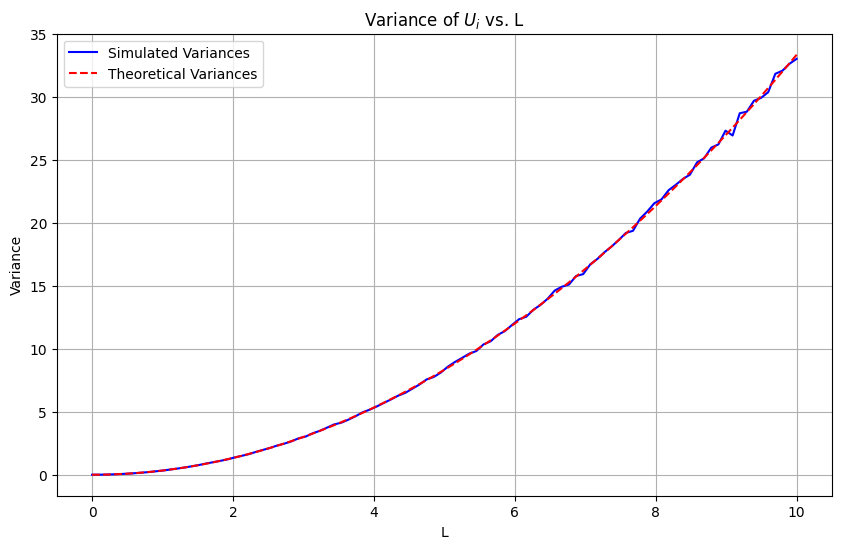

In [5]:
import matplotlib.pyplot as plt

# Define u_0
u_0 = 0

# Define a range of L values
L_values = np.linspace(0, 10, 100)

# Store the variances
variances = []

# Simulate Ui for each L and compute the variance
for L in L_values:
    U_i = np.random.uniform(u_0 - L, u_0 + L, size=10000)
    variances.append(np.var(U_i))

# Theoretical variances
theoretical_variances = L_values**2 / 3

# Plotting
plt.figure(figsize=(10,6))
plt.plot(L_values, variances, label='Simulated Variances', color='blue')
plt.plot(L_values, theoretical_variances, label='Theoretical Variances', linestyle='--', color='red')
plt.xlabel('L')
plt.ylabel('Variance')
plt.title('Variance of $U_i$ vs. L')
plt.legend()
plt.grid(True)
plt.show()

### Part B
Now consider the sum

$$
S_N = \sum_{i=1}^N U_i
$$

Use CLT to approximate $\mathbb{P}(S_N > u_0 + \frac{L}{4})$ in terms of the cumulative distribution of a Normal random variable.

### Solution

## Exercise 4.
(Model with conditional variance): Consider the model:

$$
X \sim Bernoulli(q)
$$

$$
Y \mid X \sim N(a, X + 2(1 - X))
$$

### Part A
Is this a linear regression model (for the variable $Y$) as defined in class? Are $X$ and $Y$ independent?

### Solution
We can see that $E[Y \mid X] = a$, so the mean of $Y$ is not a linear function of $X$. Therefore, this is not a linear regression model. Only the variance of $Y$ is a linear function of $X$, so this is not a linear model as we discussed in class. 

Even though this may not be a linear regression model, the distribution of $Y$ changes given different values of $X$, so $X$ and $Y$ are not independent.

### Part B
Compute $cov(X, Y)$

### Solution
Remember that $cov(X, Y) = E[XY] - E[X]E[Y]$. W

We can see that $E[X] = q$ because it is bernoulli distributed with parameter $q$. 

We can also see that $E[Y] = a$ because $Y$ is normally distributed with mean $a$.

By tower property: $E[XY] = E[X \times E[Y \mid X]]$

$$
E[Y \mid X] = a \Rightarrow E[XY] = E[X \times a] = aE[X] = aq
$$

Therefore, $cov(X, Y) = aq - aq = 0$


### Part C
Confirm your answers by making a plot of the covariance as a function of $q$ from a sample of $10000$ $(x, y)$ points.

### Solution

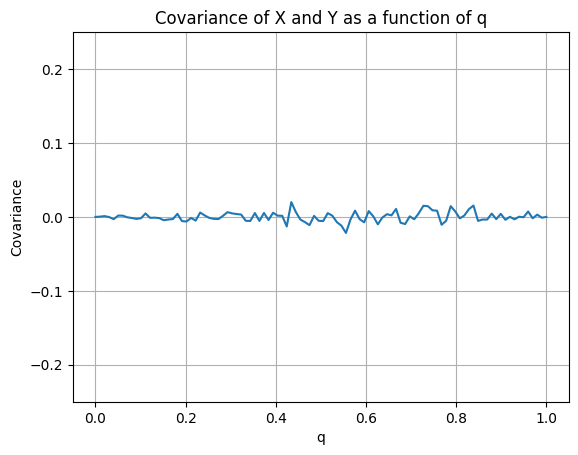

In [13]:
# Constants
a = 1.0
num_samples = 10000
q_values = np.linspace(0, 1, 100)

covariances = []

for q in q_values:
    # Generate samples for X from Bernoulli distribution
    x_samples = np.random.binomial(1, q, num_samples)
    
    # Generate samples for Y given X
    y_samples = [np.random.normal(a, x + 2*(1 - x)) for x in x_samples]
    
    # Compute the covariance for the samples
    cov = np.cov(x_samples, y_samples)[0][1]
    covariances.append(cov)

# Plot
plt.plot(q_values, covariances)
plt.xlabel('q')
plt.ylabel('Covariance')
plt.title('Covariance of X and Y as a function of q')
plt.grid(True)
plt.ylim(-0.25, .25)
plt.show()

## Exercise 5
(Swapping response and predictor variables): Consider the conditionally normal model introduced in class:

$$
X \sim N(\mu_X, \sigma_X^2)
$$

$$
Y \mid X \sim N(\beta_1 X + \beta_0, \sigma_{Y \mid X}^2)
$$

This is a regression model for $Y$. The goal of this problem is to understand the distribution of $X$ conditioned on $Y$. That is, we would like to understand the corresponding regression model for $X$. This is important, because in some applications we have to make a choice about which variable to take as our response and which as our predictor. This exercise will help us understand how the regression parameters we infer depend on this choice. It will also sharpen our understanding of what the covariance really means.

For some additional motivation, suppose that there is no noise in $Y \mid X$ (meaning $\sigma_{Y \mid X}^2 = 0$). Then

$$
Y = \beta_1 X + \beta_0 \Rightarrow X = \frac{1}{\beta_1}Y - \frac{\beta_0}{\beta_1}
$$

So the slope of X vs Y is $\frac{1}{\beta_1}$. We could try adding a normal random variable $Z \sim N(0, \sigma_{Y \mid X}^2)$ to represent the noise in $Y \mid X$ and then solve this again. This would lead us to 

$$
Y = \beta_1 X + \beta_0 + Z \Rightarrow X = \frac{1}{\beta_1}(Y) - \frac{\beta_0}{\beta_1} + \frac{Z}{\beta_1}
$$

It is tempting to conclude that $Y \mid X$ follows a normal distribution with mean $\frac{Y}{\beta_1} - \frac{\beta_0}{\beta_1}$ and variance $\frac{\sigma_{Y \mid X}^2}{\beta_1^2}$. This is however false - see part (c). In this problem, you will derive the correct formula.
